In [ ]:
from google.colab import files
uploaded = files.upload()

Saving simple_file_name_utf8.csv to simple_file_name_utf8 (1).csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['simple_file_name_utf8.csv']))

Look like a STACKED dataframe 

Need to deal with issues r/t 'Hospital' column - how do we treat 'Statewide' value 

For COUNTY = AAAA // will want to exclude 

... HOW DO WE CLEAN THIS // 
Potential issue with 'Hospital' string column -> Alta Bates Summit Medical Center ‚Äì

- Shoudl we transform YEAR to something clearner 

Create 2 new variables for GPS -> 1 column that is LAT another being LON 

- NEED TO HARD CODE ERRORS WITH 2013 on AAAA county for Deaths/Cases 


In [ ]:
df.head(5)

,Year,County,Hospital,OSHPDID,Measure,Risk Adjusted Rate,# of Deaths/Readmissions,# of Cases,Hospital Ratings,Location 1
0,2011-2012,NaN,Statewide,NaN,30-day Mortality,10.55,7406.0,70213.0,NaN,NaN
1,2011-2012,NaN,Statewide,NaN,30-day Readmission,12.80,8527.0,66612.0,NaN,NaN
2,2011-2012,Alameda,Alameda Hospital,106010735,30-day Readmission,18.66,18.0,92.0,As Expected,"(37.762953, -122.25362)"
3,2011-2012,Alameda,Alameda Hospital,106010735,30-day Mortality,12.22,12.0,95.0,As Expected,"(37.762953, -122.25362)"
4,2011-2012,Alameda,Alta Bates Summit Medical Center ‚Äì Alta Bate...,106010739,30-day Readmission,11.91,34.0,281.0,As Expected,"(37.85633, -122.25784)"


In [ ]:
list(df)

['Year',
 'County',
 'Hospital',
 'OSHPDID',
 'Measure',
 'Risk Adjusted Rate',
 '# of Deaths/Readmissions',
 '# of Cases',
 'Hospital Ratings',
 'Location 1']

In [ ]:
df.dtypes

Year                         object
County                       object
Hospital                     object
OSHPDID                      object
Measure                      object
Risk Adjusted Rate          float64
# of Deaths/Readmissions    float64
# of Cases                  float64
Hospital Ratings             object
Location 1                   object
dtype: object

In [ ]:
df['Year'].value_counts()

2011-2012    554
2012-2013    550
2013-2014    550
2014-2015    534
Name: Year, dtype: int64

In [ ]:
# Lets now re-code our 'YEAR' column into something simpler 
# Lets ASSUME that we want to keep the first year, first part only 

In [ ]:
# WAY 1 - RECODE // by removing everything after the '-' 

In [ ]:
# Removing everything after the '-'
df['Year'] = df['Year'].str.split('-').str[0]


In [ ]:
# WAY 2 - RECODE // by assigning a new value to all potential value counts 

def yearrecoder(row):
    if row['Year'] == '2011-2012' : return '2011'
    elif (row['Year'] == '2012-2013') : return '2012'
    elif row['Year'] == '2013-2014' : return '2013'
    elif row['Year'] == '2014-2015' : return '2014'

df['Year'] = df.apply( lambda row : yearrecoder(row), axis = 1)
df['Year']

0       2011
1       2011
2       2011
3       2011
4       2011
        ... 
2183    2014
2184    2014
2185    2014
2186    2014
2187    2014
Name: Year, Length: 2188, dtype: object

In [ ]:
dataframe_hospital = pd.DataFrame(df['Hospital'].value_counts())
dataframe_hospital

dataframe_hospital2 = dataframe_hospital
dataframe_hospital2.columns.str.replace(r"[^a-zA-Z\d\_]+", "")
dataframe_hospital2

,Hospital
Garfield Medical Center,8
John F. Kennedy Memorial Hospital,8
Barstow Community Hospital,8
Long Beach Memorial Medical Center,8
Regional Medical of San Jose,8
...,...
Hazel HawkiAs Expected Memorial Hospital,2
Kaiser Foundation Hospital ñ San Leandro,2
North Bay VacaValley Hospital,2
Community and Mission Hospital of Huntington Park ñ Slauson,1


In [ ]:
df_group = df.groupby(['Year'])
df_group.describe()

Risk Adjusted Rate                       ... # of Cases                 
                  count       mean       std  ...        50%     75%      max
Year                                          ...                            
2011              552.0  11.616667  3.720010  ...      200.0  361.50  70213.0
2012              547.0  11.274936  3.623153  ...      209.0  374.00  70447.0
2013              545.0  10.846477  3.581650  ...       23.0   42.00  73982.0
2014              534.0  10.865393  3.528105  ...      189.5  332.75  65789.0

[4 rows x 24 columns]

In [ ]:
df_county = df 
df_county = df[df['County'] == 'AAAA']
df_county

,Year,County,Hospital,OSHPDID,Measure,Risk Adjusted Rate,# of Deaths/Readmissions,# of Cases,Hospital Ratings,Location 1
555,2012,AAAA,Statewide,NaN,30-day Mortality,10.42,7340.0,70447.0,NaN,NaN
556,2012,AAAA,Statewide,NaN,30-day Readmission,12.40,8305.0,66961.0,NaN,NaN
1105,2013,AAAA,Statewide,.,30-day Mortality,9.95,7364.0,73982.0,NaN,NaN
1106,2013,AAAA,Statewide,.,30-day Readmission,11.87,8055.0,67888.0,NaN,NaN
1654,2014,AAAA,Statewide,.,30-day Mortality,9.81,6454.0,65789.0,NaN,NaN
1655,2014,AAAA,Statewide,.,30-day Readmission,11.80,7394.0,62681.0,NaN,NaN


In [ ]:
#df 
# 1105 73982.0 7364.0
#1106 67888.0 8055.0
# deaths/readmission -> # cases 

# # of Cases'

#df.iloc[1105, 6] = 

df.iloc[1105, df.columns.get_loc('# of Deaths/Readmissions')] = 7364.0
df.iloc[1105, df.columns.get_loc('# of Cases')] = 73982.0

df.iloc[1106, df.columns.get_loc('# of Deaths/Readmissions')] = 8055.0
df.iloc[1106, df.columns.get_loc('# of Cases')] = 67888.0


Risk Adjusted Rate                       ... # of Cases                 
                  count       mean       std  ...        50%     75%      max
Year                                          ...                            
2011              552.0  11.616667  3.720010  ...      200.0  361.50  70213.0
2012              547.0  11.274936  3.623153  ...      209.0  374.00  70447.0
2013              545.0  10.846477  3.581650  ...       23.0   42.00  73982.0
2014              534.0  10.865393  3.528105  ...      189.5  332.75  65789.0

[4 rows x 24 columns]

In [ ]:
df_2013 = df[df['Year'] == '2013']
#df_2013 = df_2013['# of Deaths/Readmissions']
#df_2013.describe()
df_2013[df_2013['# of Deaths/Readmissions'] > 8000]


,Year,County,Hospital,OSHPDID,Measure,Risk Adjusted Rate,# of Deaths/Readmissions,# of Cases,Hospital Ratings,Location 1
1106,2013,AAAA,Statewide,.,30-day Readmission,11.87,8055.0,67888.0,NaN,NaN


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


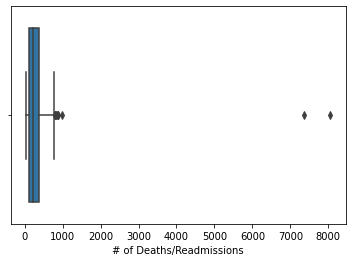

In [ ]:
import seaborn as sns
sns.boxplot(x=df_2013['# of Deaths/Readmissions'])

In [ ]:
Q1 = df.quantile(0.10)
Q3 = df.quantile(0.90)
IQR = Q3 - Q1
df_2013 = df_2013[~((df_2013 < (Q1 - 1.5 * IQR)) |(df_2013 > (Q3 + 1.5 * IQR))).any(axis=1)]

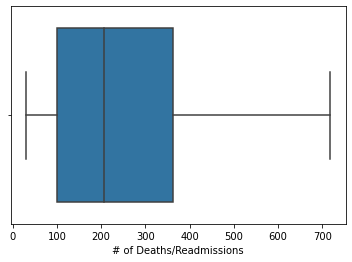

In [ ]:
import seaborn as sns
sns.boxplot(x=df_2013['# of Deaths/Readmissions'])